# Sann


In [10]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

from google.colab import drive
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
drive.mount('/content/gdrive', force_remount= True)
print('Drive mounted')

file = r'/content/gdrive/My Drive/Colab Notebooks/Daily news/archive/Combined_News_DJIA.csv'
Combined_News = pd.read_csv(file)
print(Combined_News.head(1))
file = r'/content/gdrive/My Drive/Colab Notebooks/Daily news/archive/RedditNews.csv'
Reddit_News = pd.read_csv(file)
#print(Reddit_News.head(5))
file = r'/content/gdrive/My Drive/Colab Notebooks/Daily news/archive/upload_DJIA_table.csv'
DJIA_table = pd.read_csv(file)
#print(DJIA_table.head(5))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



Mounted at /content/gdrive
Drive mounted
         Date  Label  \
0  2008-08-08  0       

                                                                         Top1  \
0  b"Georgia 'downs two Russian warplanes' as countries move to brink of war"   

                                      Top2  \
0  b'BREAKING: Musharraf to be impeached.'   

                                                                                          Top3  \
0  b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)'   

                                                                                                                                          Top4  \
0  b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire'   

                                                                                                                          Top5  \
0  b"Afghan children raped with 'i

In [ ]:
Combined_News.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [ ]:
df= Combined_News
df = pd.melt(df, id_vars =['Label','Date'],value_vars =['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'], 
              var_name ='Top_#', value_name ='Headline')

In [ ]:
#checking for null values in every column
print('Checking for null values in every col before')
print(df.isnull().sum())
#dropping null values
df = df.dropna()
print('Checking for null values in every col after')
print(df.isnull().sum())
df2 = df

Checking for null values in every col before
Label       0
Date        0
Top_#       0
Headline    7
dtype: int64
Checking for null values in every col after
Label       0
Date        0
Top_#       0
Headline    0
dtype: int64


In [ ]:
df2 = df2.drop(['Top_#'], axis=1)
df2.to_csv('/content/gdrive/My Drive/Colab Notebooks/Daily news/combined.csv')

In [ ]:
!pip install texthero

     |████████████████████████████████| 245kB 15.6MB/s 
     |████████████████████████████████| 1.4MB 29.4MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434675 sha256=9501004520b42d01058e3472ec946f093f3658aafaaca491b057d47074af2ab5
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
from textblob import TextBlob
import texthero as hero
from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer 
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import EnglishStemmer
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer = EnglishStemmer()
analyzer = CountVectorizer().build_analyzer()
def cleaning_strings(news):
  if news.find('b',0,1) != -1:
    list_n = list(news)
    list_n = list_n[1:]
    news = ''.join(list_n)
  t = pd.Series(news)
  t = hero.remove_punctuation(t)
  #t = hero.remove_stopwords(t)
  #t = hero.remove_whitespace(t)
  #print(t)
  #t[0] = [stemmer.stem(w) for w in analyzer(t[0])]
  news = ''.join(t[0])
  #news = news[1:]
  news = news.lower()
  return news

In [ ]:
print(df2['Headline'][99])
#print(list(df2['Headline'][49717]))
print(cleaning_strings(df2['Headline'][99]))
print(df2.shape[0],df2.shape[1])

 greece  union activist loses her eye in acid attack  her supporters blockade company  riot police  forced to run leaving shields  helmets and even shoes behind 
 greece  union activist loses her eye in acid attack  her supporters blockade company  riot police  forced to run leaving shields  helmets and even shoes behind 
49718 4


In [ ]:
#df2['polarity'] =df2['Headline'].apply(lambda x: TextBlob(str(x).lower()).sentiment.polarity)
#df2['subjectivity'] =df2['Headline'].apply(lambda x: TextBlob(str(x).lower()).sentiment.subjectivity)
df2['Headline'] =df2['Headline'].apply(lambda x: cleaning_strings(x))

In [ ]:
df2.dtypes
df2['Date'] = pd.to_datetime(df['Date']).dt.date
df2.dtypes

Label       int64 
Date        object
Top_#       object
Headline    object
dtype: object

In [ ]:
df2.head(5)

,Label,Date,Top_#,Headline
0,0,2008-08-08,Top1,georgia downs two russian warplanes as countries move to brink of war
1,1,2008-08-11,Top1,why wont america and nato help us if they wont help us now why did we help them in iraq
2,0,2008-08-12,Top1,remember that adorable 9 year old who sang at the opening ceremonies that was fake too
3,0,2008-08-13,Top1,u s refuses israel weapons to attack iran report
4,1,2008-08-14,Top1,all the experts admit that we should legalise drugs


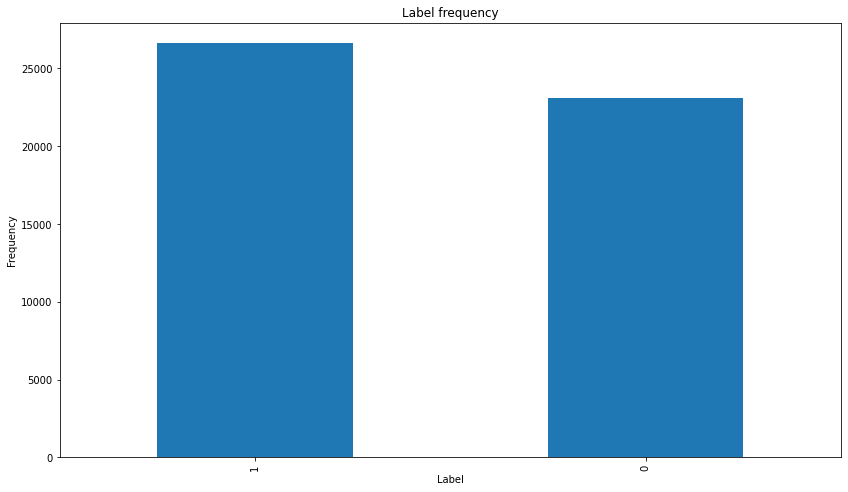

In [ ]:
ax = df2['Label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Label frequency")
ax.set_xlabel("Label")
ax.set_ylabel("Frequency")
plt.show()

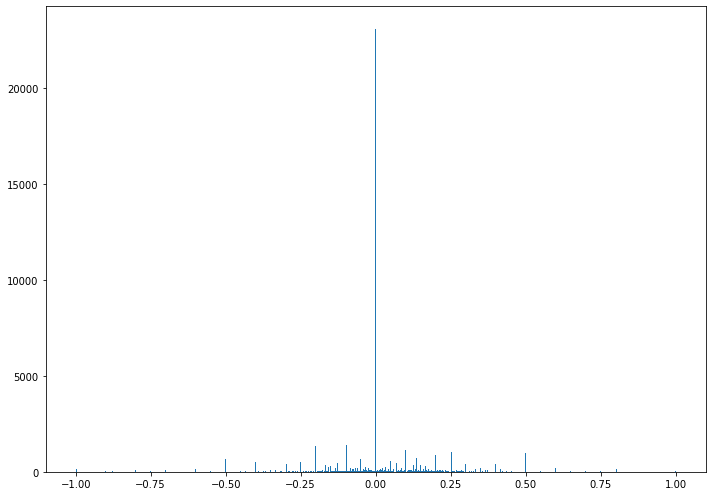

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7),tight_layout= True) 
ax.hist(df2['polarity'], bins = 'auto') 
  
# Show plot 
plt.show() 

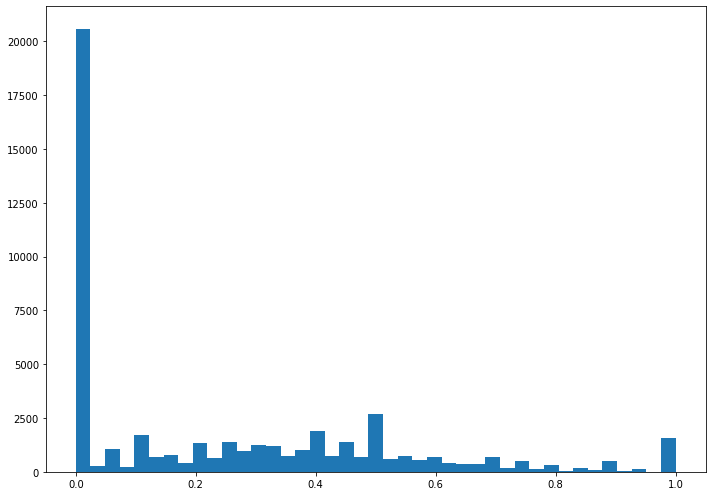

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7),tight_layout= True) 
ax.hist(df2['subjectivity'], bins = 'auto') 
  
# Show plot 
plt.show() 

In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 133kB/s 
     |████████████████████████████████| 983kB 49.6MB/s 
     |████████████████████████████████| 266kB 49.9MB/s 
     |████████████████████████████████| 1.3MB 45.5MB/s 
     |████████████████████████████████| 1.1MB 34.4MB/s 
     |████████████████████████████████| 471kB 46.6MB/s 
     |████████████████████████████████| 890kB 48.9MB/s 
     |████████████████████████████████| 2.9MB 45.3MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.2-cp36-none-any.whl size=25276306 sha256=5e00052067c8056718715345a06257117bd7c1b4f583c4824faa9e9868142e99
  Stored in directory: /root/.cache/pip/wheels/fe/56/00/25444c352cc843e5c5daea0e9517a192878ae22c2c6b5f4573
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=e9a4335d11f988d6d85ccc669711a9593326e0345f078eb69ddb4ec1c0b16058
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
  Created wheel for syn

In [ ]:
!pip install pipelinehelper

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from statistics import *
import tensorflow as tf
import ktrain
from ktrain import text
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from pipelinehelper import PipelineHelper

In [ ]:
stemmer = EnglishStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    print(type(doc))
    print(doc)
    #print((stemmer.stem(w) for w in analyzer(doc)))
    doc = ' '.join([stemmer.stem(w) for w in analyzer(doc)])
    print(doc)
    return doc
def ml_models(X_train,y_train):
  param_range = [9, 10]
  param_range_fl = [1.0, 0.5]
  ml_models = {
      'MultinomialNB':MultinomialNB(),
      'lr':LogisticRegression(max_iter=1000),
      'knn':KNeighborsClassifier(algorithm = 'auto'),
      'svm':SVC(),
      'decisiontree': DecisionTreeClassifier(),
      'rf':RandomForestClassifier(),
      'xgclassifier':XGBClassifier()
  }
  pipe = Pipeline([
  ('vectorizer', PipelineHelper([
    ('vect', CountVectorizer(analyzer=stemmed_words, stop_words='english')),
    ('tfidf', TfidfTransformer()),
  ])),
  ('classifier', PipelineHelper([
    ('MultinomialNB',MultinomialNB()),
    ('lr',LogisticRegression(max_iter=500)),
    ('knn',KNeighborsClassifier(algorithm = 'auto')),
    ('svm',SVC()),
    ('decisiontree', DecisionTreeClassifier()),
    ('rf',RandomForestClassifier()),
    ('xgclassifier',XGBClassifier())
  ])),
  ])
  params = {
    'vectorizer__selected_model': pipe.named_steps['vectorizer'].generate({
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__max_features': [None, 5000, 10000, 50000],
        'vect__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
        'tfidf__use_idf': [True, False],
        'tfidf__norm': ['l1', 'l2'],
        #'std__with_mean': [True, False],
        #'std__with_std': [True, False],
        #'max__copy': [True],  # just for displaying
    }),
    'classifier__selected_model': pipe.named_steps['classifier'].generate({
        'MultinomialNB__alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
        'svm__C': [1, 10, 100, 1000],
        'svm__kernel': ['linear','rbf','poly','sigmoid','precomputed'],
        'svm__gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
        'lr__penalty' : ['l1','l2','elasticnet'],
        'lr__solver' : ['liblinear'],
        'rf__criterion': ['gini', 'entropy'],
        'knn__n_neighbors' : [3,5,7,10,14,18,23],
        'knn__weights' : ['uniform', 'distance'],
        'decisiontree__max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
        'xgclassifier__n_estimators': [400, 700, 1000],
        'xgclassifier__colsample_bytree': [0.7, 0.8],
        'xgclassifier__max_depth': [15,20,25],
        'xgclassifier__reg_alpha': [1.1, 1.2, 1.3],
        'xgclassifier__reg_lambda': [1.1, 1.2, 1.3],
        'xgclassifier__subsample': [0.7, 0.8, 0.9]
    })
  }
  grid = GridSearchCV(pipe, params, scoring='accuracy', verbose=1,cv = 10,n_jobs=-1)
  grid.fit(X_train,y_train)
  print(grid.best_params_)
  print(grid.best_score_)

In [ ]:
def ml_models_indi(X_train,y_train):
  param_range = [9, 10]
  param_range_fl = [1.0, 0.5]
  pipe_nb = Pipeline([
  ('vectorizer', PipelineHelper([
    ('vect', CountVectorizer(analyzer=stemmed_words, stop_words='english')),
    ('tfidf', TfidfTransformer()),
  ])),
  ('classifier', PipelineHelper([
    ('MultinomialNB',MultinomialNB()),
  ])),
  ])
  params_nb = {
    'vectorizer__selected_model': pipe_nb.named_steps['vectorizer'].generate({
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__max_features': [None, 5000, 10000, 50000],
        'vect__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
        'tfidf__use_idf': [True, False],
        'tfidf__norm': ['l1', 'l2'],
        #'std__with_mean': [True, False],
        #'std__with_std': [True, False],
        #'max__copy': [True],  # just for displaying
    }),
    'classifier__selected_model': pipe_nb.named_steps['classifier'].generate({
        'MultinomialNB__alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    })
    }
  pipe_lr = Pipeline([
  ('vectorizer', PipelineHelper([
    ('vect', CountVectorizer(analyzer=stemmed_words, stop_words='english')),
    ('tfidf', TfidfTransformer()),
  ])),
  ('classifier', PipelineHelper([
    ('lr',LogisticRegression(max_iter=500))
  ])),
  ])
  params_lr = {
    'vectorizer__selected_model': pipe_lr.named_steps['vectorizer'].generate({
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__max_features': [None, 5000, 10000, 50000],
        'vect__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
        'tfidf__use_idf': [True, False],
        'tfidf__norm': ['l1', 'l2'],
        #'std__with_mean': [True, False],
        #'std__with_std': [True, False],
        #'max__copy': [True],  # just for displaying
    }),
    'classifier__selected_model': pipe_lr.named_steps['classifier'].generate({
        'lr__penalty' : ['l1','l2','elasticnet'],
        'lr__solver' : ['liblinear'],
    })
  }
  pipe_knn = Pipeline([
  ('vectorizer', PipelineHelper([
    ('vect', CountVectorizer(analyzer=stemmed_words, stop_words='english')),
    ('tfidf', TfidfTransformer()),
  ])),
  ('classifier', PipelineHelper([
    ('knn',KNeighborsClassifier(algorithm = 'auto')),
  ])),
  ])
  params_knn = {
    'vectorizer__selected_model': pipe_knn.named_steps['vectorizer'].generate({
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__max_features': [None, 5000, 10000, 50000],
        'vect__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
        'tfidf__use_idf': [True, False],
        'tfidf__norm': ['l1', 'l2'],
        #'std__with_mean': [True, False],
        #'std__with_std': [True, False],
        #'max__copy': [True],  # just for displaying
    }),
    'classifier__selected_model': pipe_knn.named_steps['classifier'].generate({
        'knn__n_neighbors' : [3,5,7,10,14,18,23],
        'knn__weights' : ['uniform', 'distance'],
      })
  }
  pipe_svc = Pipeline([
  ('vectorizer', PipelineHelper([
    ('vect', CountVectorizer(analyzer=stemmed_words, stop_words='english')),
    ('tfidf', TfidfTransformer()),
  ])),
  ('classifier', PipelineHelper([
    ('svm',SVC()),
    ])),
  ])
  params_svc = {
    'vectorizer__selected_model': pipe_svc.named_steps['vectorizer'].generate({
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__max_features': [None, 5000, 10000, 50000],
        'vect__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
        'tfidf__use_idf': [True, False],
        'tfidf__norm': ['l1', 'l2'],
        #'std__with_mean': [True, False],
        #'std__with_std': [True, False],
        #'max__copy': [True],  # just for displaying
    }),
    'classifier__selected_model': pipe_svc.named_steps['classifier'].generate({
        'svm__C': [1, 10, 100, 1000],
        'svm__kernel': ['linear','rbf','poly','sigmoid','precomputed'],
        'svm__gamma' : [1, 0.1, 0.01, 0.001, 0.0001]
    })
  }
  pipe_dt = Pipeline([
  ('vectorizer', PipelineHelper([
    ('vect', CountVectorizer(analyzer=stemmed_words, stop_words='english')),
    ('tfidf', TfidfTransformer()),
  ])),
  ('classifier', PipelineHelper([
    ('decisiontree', DecisionTreeClassifier())
  ])),
  ])
  params_dt = {
    'vectorizer__selected_model': pipe_dt.named_steps['vectorizer'].generate({
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__max_features': [None, 5000, 10000, 50000],
        'vect__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
        'tfidf__use_idf': [True, False],
        'tfidf__norm': ['l1', 'l2'],
        #'std__with_mean': [True, False],
        #'std__with_std': [True, False],
        #'max__copy': [True],  # just for displaying
    }),
    'classifier__selected_model': pipe_dt.named_steps['classifier'].generate({
        'decisiontree__max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
    })
  }
  pipe_rf = Pipeline([
  ('vectorizer', PipelineHelper([
    ('vect', CountVectorizer(analyzer=stemmed_words, stop_words='english')),
    ('tfidf', TfidfTransformer()),
  ])),
  ('classifier', PipelineHelper([
    ('rf',RandomForestClassifier()),
  ])),
  ])
  params_rf = {
    'vectorizer__selected_model': pipe_rf.named_steps['vectorizer'].generate({
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__max_features': [None, 5000, 10000, 50000],
        'vect__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
        'tfidf__use_idf': [True, False],
        'tfidf__norm': ['l1', 'l2'],
        #'std__with_mean': [True, False],
        #'std__with_std': [True, False],
        #'max__copy': [True],  # just for displaying
    }),
    'classifier__selected_model': pipe_rf.named_steps['classifier'].generate({
        'rf__criterion': ['gini', 'entropy'],
    })
  }
  pipe_xg = Pipeline([
  ('vectorizer', PipelineHelper([
    ('vect', CountVectorizer(analyzer=stemmed_words, stop_words='english')),
    ('tfidf', TfidfTransformer()),
  ])),
  ('classifier', PipelineHelper([
    ('xgclassifier',XGBClassifier())
  ])),
  ])
  params_xg = {
    'vectorizer__selected_model': pipe_xg.named_steps['vectorizer'].generate({
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__max_features': [None, 5000, 10000, 50000],
        'vect__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
        'tfidf__use_idf': [True, False],
        'tfidf__norm': ['l1', 'l2'],
        #'std__with_mean': [True, False],
        #'std__with_std': [True, False],
        #'max__copy': [True],  # just for displaying
    }),
    'classifier__selected_model': pipe_xg.named_steps['classifier'].generate({
        'xgclassifier__n_estimators': [400, 700, 1000],
        'xgclassifier__colsample_bytree': [0.7, 0.8],
        'xgclassifier__max_depth': [15,20,25],
        'xgclassifier__reg_alpha': [1.1, 1.2, 1.3],
        'xgclassifier__reg_lambda': [1.1, 1.2, 1.3],
        'xgclassifier__subsample': [0.7, 0.8, 0.9]
    })
  }
  grid_nb = GridSearchCV(pipe_nb, params_nb, scoring='accuracy', verbose=1,cv = 10,n_jobs=-1)
  grid_nb.fit(X_train,y_train)
  print('Model name : Navies Bayes')
  print(grid_nb.best_params_)
  print(grid_nb.best_score_)
  grid_lr = GridSearchCV(pipe_lr, params_lr, scoring='accuracy', verbose=1,cv = 10,n_jobs=-1)
  grid_lr.fit(X_train,y_train)
  print('Model name : logistic regression')
  print(grid_lr.best_params_)
  print(grid_lr.best_score_)
  grid_knn = GridSearchCV(pipe_knn, params_knn, scoring='accuracy', verbose=1,cv = 10,n_jobs=-1)
  grid_knn.fit(X_train,y_train)
  print('Model name : Knn')
  print(grid_knn.best_params_)
  print(grid_knn.best_score_)
  grid_svc = GridSearchCV(pipe_svc, params_svc, scoring='accuracy', verbose=1,cv = 10,n_jobs=-1)
  grid_svc.fit(X_train,y_train)
  print('Model name : SVM')
  print(grid_svc.best_params_)
  print(grid_svc.best_score_)
  grid_rf = GridSearchCV(pipe_rf, params_rf, scoring='accuracy', verbose=1,cv = 10,n_jobs=-1)
  grid_rf.fit(X_train,y_train)
  print('Model name : random forest')
  print(grid_rf.best_params_)
  print(grid_rf.best_score_)
  grid_dt = GridSearchCV(pipe_dt, params_dt, scoring='accuracy', verbose=1,cv = 10,n_jobs=-1)
  grid_dt.fit(X_train,y_train)
  print('Model name : Decision Tree')
  print(grid_dt.best_params_)
  print(grid_dt.best_score_)
  grid_xg = GridSearchCV(pipe_xg, params_xg, scoring='accuracy', verbose=1,cv = 10,n_jobs=-1)
  grid_xg.fit(X_train,y_train)
  print('Model name : XGBoost')
  print(grid_xg.best_params_)
  print(grid_xg.best_score_)

In [ ]:
# Split into train and testing datasets
train = df2[df2['Date'] <= pd.to_datetime('2015-01-01').date()]
test = df2[df2['Date'] >= pd.to_datetime('2014-12-31').date()]
train.head(5)

,Label,Date,Top_#,Headline
0,0,2008-08-08,Top1,georgia downs two russian warplanes as countries move to brink of war
1,1,2008-08-11,Top1,why wont america and nato help us if they wont help us now why did we help them in iraq
2,0,2008-08-12,Top1,remember that adorable 9 year old who sang at the opening ceremonies that was fake too
3,0,2008-08-13,Top1,u s refuses israel weapons to attack iran report
4,1,2008-08-14,Top1,all the experts admit that we should legalise drugs


In [ ]:
y_train = train['Label']
X_train = train.drop(['Label'], axis=1)
X_train = X_train['Headline']
print(type(X_train))

<class 'pandas.core.series.Series'>


In [ ]:
df2 = df2.drop(['Top_#'], axis=1)
df2.to_csv('/content/gdrive/My Drive/Colab Notebooks/Daily news/combined.csv')
#!cp combined.csv "drive/My Drive/"

In [ ]:
ml_models_indi(X_train,y_train)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 20.0min


KeyboardInterrupt: ignored

In [ ]:
"""  parameters = {
      'vect__max_df': (0.5, 0.75, 1.0),
      'vect__max_features': (None, 5000, 10000, 50000),
      'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
      'tfidf__use_idf': (True, False),
      'tfidf__norm': ('l1', 'l2'),
      'MultinomialNB__alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
      'svm__C': (1, 10, 100, 1000)
      'svm__kernel': ('linear','rbf')
      'svm__gamma' : (1, 0.1, 0.01, 0.001, 0.0001),
      #'clf__max_iter': (20,),
      #'clf__alpha': (0.00001, 0.000001),
      #'clf__penalty': ('l2', 'elasticnet'),
      #'clf__max_iter': (10, 50, 80),
  }"""
  # find the best parameters for both the feature extraction and the classifier
"""for name,model in ml_models.items():
    pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    (name, model)
    ])
    if name == 'svm':
      parameters = 
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)"""

In [ ]:
)#Function to deploy ml models for a given dataset
#Link to follow https://medium.com/@alex.ortner.1982/top-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2
# https://stackoverflow.com/questions/49761807/an-typeerror-with-votingclassifier
# https://github.com/amaiya/ktrain/blob/master/examples/text/ArabicHotelReviews-nbsvm.ipynb
# https://github.com/amaiya/ktrain/blob/master/tutorials/tutorial-04-text-classification.ipynb
# https://medium.com/@sowhardh.honnappa/implement-googles-bert-on-colab-part-2-716e2ba9808a
# https://towardsdatascience.com/natural-language-processing-classification-using-deep-learning-and-word2vec-50cbadd3bd6a
def CreateModels(X,y):
  #X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  ml_models = {
      'MultinomialNB':MultinomialNB(),
      'lr':LogisticRegression(max_iter=1000),
      'knn':KNeighborsClassifier(algorithm = 'brute'),
      'svm':LinearSVC(C=0.0001),
      'decisiontree': DecisionTreeClassifier(),
      'rf':RandomForestClassifier(),
      'xgclassifier':XGBClassifier()
  }
  evc=VotingClassifier(estimators=[('mnb',ml_models.get('MultinomialNB')),('lr',ml_models.get('lr')),
                                   ('rf',ml_models.get('rf')),('svm',ml_models.get('svm')),('knn',ml_models.get('knn')),
                                   ('decisonTree',ml_models.get('decisiontree')),
                                   ('xgclassifier',ml_models.get('xgclassifier'))],voting='hard')
  

  #evc.fit(x_train, y_train)
  model_scores = {}
  cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=1)
  for name,model in ml_models.items():
    model_scores[name] = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    
  n_scores = cross_val_score(evc, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
  return n_scores,model_scores


In [ ]:
def trainingBert():
  (x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(df, 
                                                                   'Headline', # name of column containing review text
                                                                   label_columns=['Label'], 
                                                                   maxlen=400,
                                                                   preprocess_mode='bert',
                                                                   val_pct=0.2,
                                                                   ngram_range=2)
  model = text.text_classifier(name='bert',
                             train_data = (x_train, y_train),
                             preproc= preproc
                             )
  learner = ktrain.get_learner(model=model,
                               train_data = (x_train,y_train),
                               val_data = (x_test,y_test),
                               batch_size = 6)
  #learner.lr_find(max_epochs=5)
  #learner.lr_plot()
  learner.autofit(1e-4, 10)
  return learner
  

In [ ]:
leaner = trainingBert()

***REFERENCES***

https://scikit-learn.org/stable/modules/cross_validation.html

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.html#sphx-glr-auto-examples-model-selection-plot-cv-predict-py


https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html#sphx-glr-auto-examples-model-selection-grid-search-text-feature-extraction-py


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

https://stackoverflow.com/questions/38709690/scikit-learn-using-gridsearchcv-on-decisiontreeclassifier#38709830

https://stackoverflow.com/questions/44066264/how-to-choose-parameters-in-tfidfvectorizer-in-sklearn-during-unsupervised-clust

https://github.com/krishnaik06/GRIDSearchCV/blob/master/Gridsearchcv.ipynb

https://stackoverflow.com/questions/23045318/scikit-grid-search-over-multiple-classifiers

https://mlfromscratch.com/gridsearch-keras-sklearn/#/



In [ ]:

"""text_clf = Pipeline([('vect', CountVectorizer(token_pattern='(?u)\\b\\w+\\b',analyzer=stemmed_words,ngram_range=(1, 1), stop_words='english')),
                     ('tfidf', TfidfTransformer())])"""

#Add the features of the dataframe that you want to transform and/or combine
"""mapper = DataFrameMapper([
     (['Label'],None),
     (['Date'], None),
     (['Top_#'], None),
     ('Headline',[CountVectorizer(token_pattern='(?u)\\b\\w+\\b',analyzer='word',ngram_range=(1, 1),stop_words=None),(TfidfTransformer())
                         ]),
     (['polarity'], None),
     (['subjectivity'], None)
 ],input_df =  True)"""
vect = TfidfVectorizer(token_pattern='(?u)\\b\\w+\\b',analyzer='word',ngram_range=(1, 1),stop_words='english',sublinear_tf=True)
features_train = vect.fit_transform(train['Headline'],1)
features_test = vect.fit_transform(test['Headline'],1)



In [ ]:
# print idf values 
df_idf = pd.DataFrame(vect.idf_, index=vect.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf = df_idf.sort_values(by=['idf_weights'])
print(df_idf.head(20))
print(df_idf.tail(20))
print(df_idf['idf_weights'].describe())

In [ ]:
scores,model_scores = CreateModels(features,df2['Label'])
print('The scores of voting :', scores)
print('The max value of voting:',max(scores))
print('The mean value of voting: ',mean(scores))
print('The values of ml models:',model_scores)

In [ ]:
vect2 = TfidfVectorizer(min_df = 4, token_pattern='(?u)\\b\\w+\\b',analyzer='word',ngram_range=(1, 1),stop_words='english',sublinear_tf=True)
features2 = vect2.fit_transform(df2['Headline'].copy(),1)

            idf_weights
b           2.423232   
s           2.707275   
says        3.988098   
new         4.062667   
world       4.148858   
government  4.220768   
israel      4.221776   
china       4.240611   
police      4.321382   
people      4.326409   
u           4.338803   
russia      4.429532   
year        4.477857   
years       4.500256   
war         4.507611   
000         4.543830   
president   4.583579   
uk          4.586480   
killed      4.650196   
iran        4.676069   
             idf_weights
chirac       10.204705  
tenth        10.204705  
remembers    10.204705  
choked       10.204705  
himalayas    10.204705  
reminds      10.204705  
tender       10.204705  
remorse      10.204705  
hiker        10.204705  
tempted      10.204705  
renegade     10.204705  
renewal      10.204705  
hideout      10.204705  
temper       10.204705  
heywood      10.204705  
hersh        10.204705  
repaid       10.204705  
circulating  10.204705  
repatriated  10.20470

Is Multi-Label? False
preprocessing test...
language: en


Is Multi-Label? False
maxlen is 400
done.
simulating training for different learning rates... this may take a few moments...
Epoch 1/5
3978/3978 [==============================] - 4781s 1s/step - loss: 0.7019 - accuracy: 0.5189
Epoch 2/5
3978/3978 [==============================] - 4773s 1s/step - loss: 0.6932 - accuracy: 0.5268
Epoch 3/5
3978/3978 [==============================] - 4761s 1s/step - loss: 0.7854 - accuracy: 0.5085
Epoch 4/5
3978/3978 [==============================] - 4737s 1s/step - loss: 5.1914 - accuracy: 0.5040


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


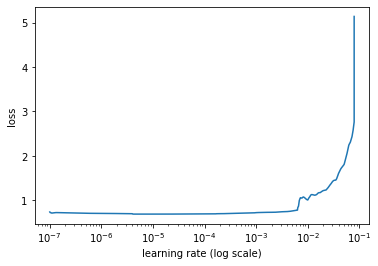

TypeError: ignored

In [ ]:
# print idf values 
df_idf2 = pd.DataFrame(vect2.idf_, index=vect2.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf2 = df_idf2.sort_values(by=['idf_weights'])
print(df_idf2.head(20))
print(df_idf2.tail(20))
print(df_idf2['idf_weights'].describe())

In [ ]:
scores2,model_scores2 = CreateModels(features2,df2['Label'])
print('The scores of voting :', scores2)
print('The max value of voting:',max(scores2))
print('The mean value of voting: ',mean(scores2))
print('The values of ml models:',model_scores2)

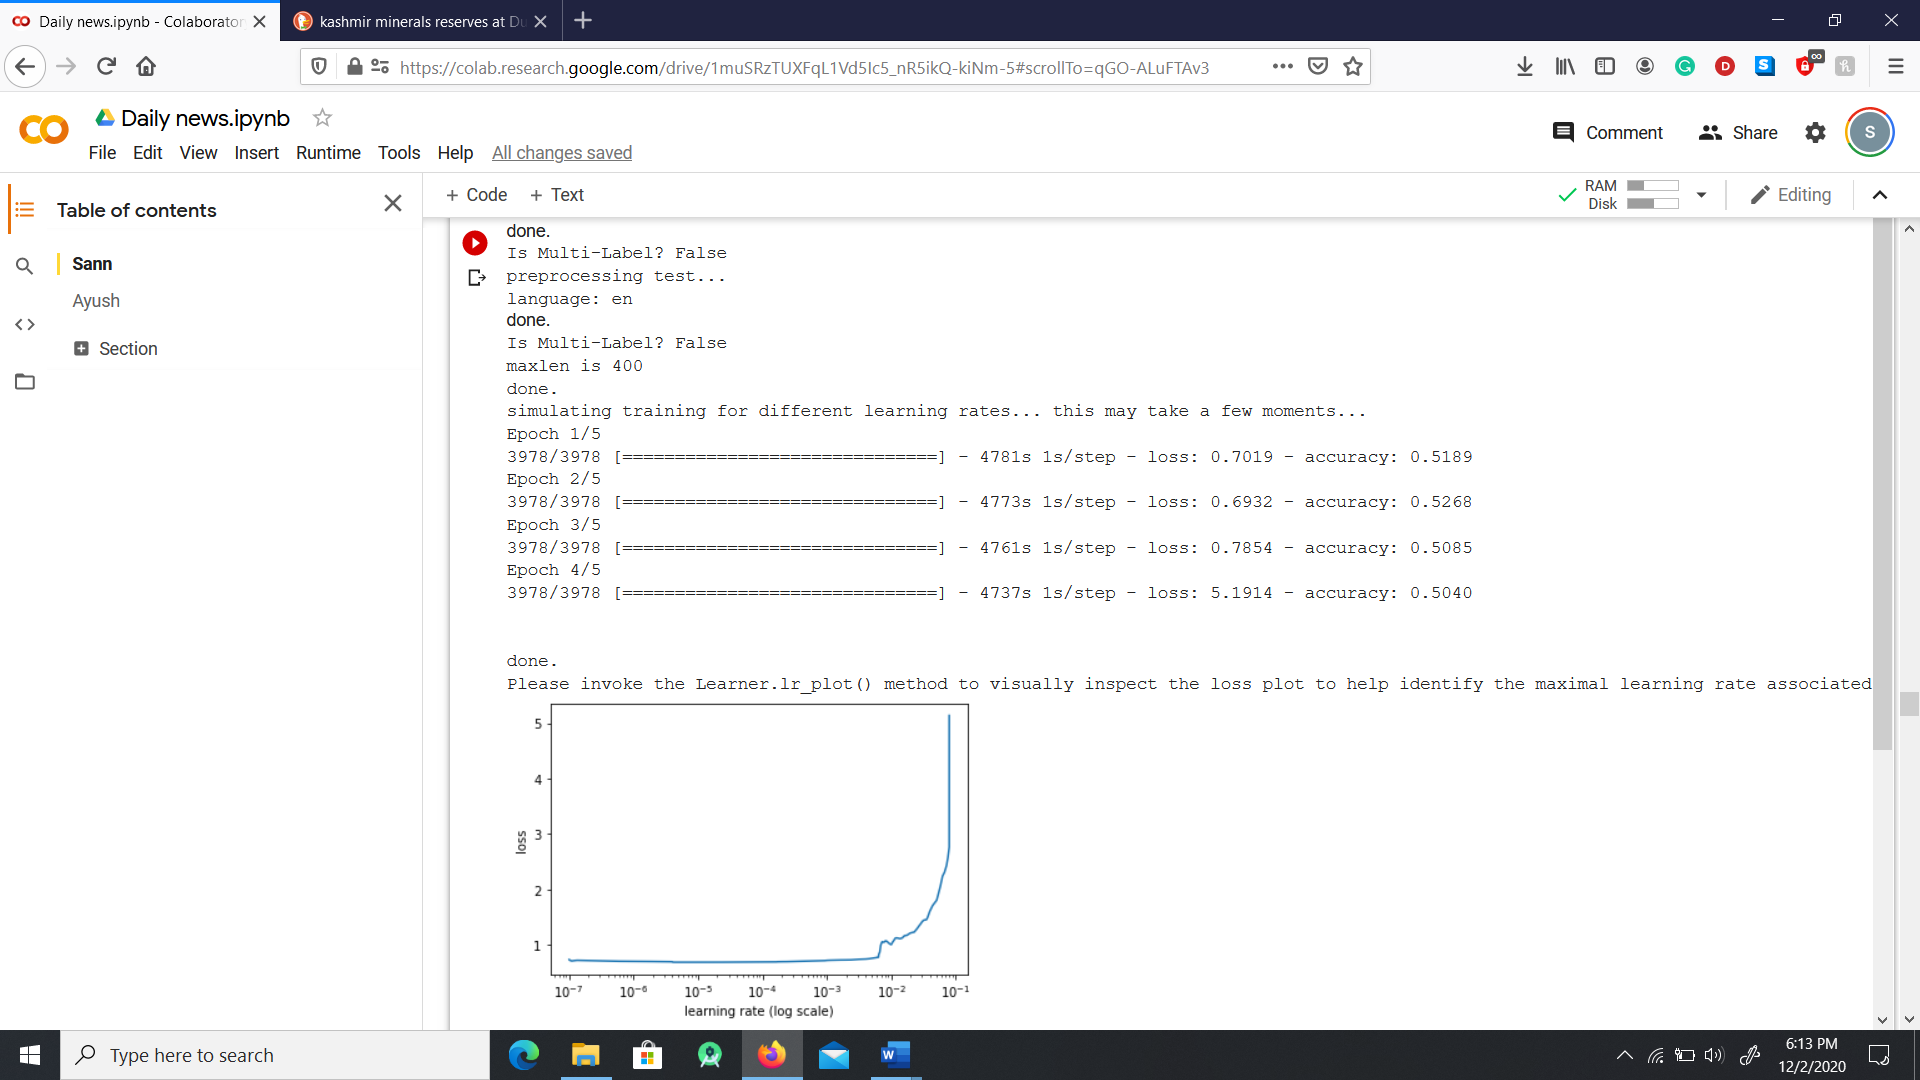

In [ ]:
vect3 = TfidfVectorizer( token_pattern='(?u)\\b\\w+\\b',analyzer='word',ngram_range=(1, 2),stop_words='english',sublinear_tf=True)
features3 = vect3.fit_transform(df2['Headline'].copy(),1)

In [ ]:
# print idf values 
df_idf3 = pd.DataFrame(vect3.idf_, index=vect3.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf3 = df_idf3.sort_values(by=['idf_weights'])
print(df_idf3.head(20))
print(df_idf3.tail(20))
print(df_idf3['idf_weights'].describe())

         idf_weights
say      3.640849   
year     3.819173   
kill     3.974617   
new      4.062667   
world    4.066546   
govern   4.133505   
china    4.206761   
israel   4.207755   
peopl    4.308650   
polic    4.315827   
countri  4.329212   
report   4.349060   
protest  4.370479   
attack   4.379295   
state    4.388189   
russia   4.398967   
war      4.475904   
000      4.543830   
presid   4.547315   
use      4.577803   
                  idf_weights
free tyranni      11.120995  
freed 53          11.120995  
freed 500         11.120995  
freed 35          11.120995  
freed 200         11.120995  
freed 17          11.120995  
freed 107         11.120995  
freeconom         11.120995  
free yrs          11.120995  
free work         11.120995  
free welfar       11.120995  
free waffl        11.120995  
free vpn          11.120995  
free vote         11.120995  
free virus        11.120995  
free upgrad       11.120995  
free univers      11.120995  
free unconstrain  1

In [ ]:
scores3,model_scores3 = CreateModels(features3,df2['Label'])
print('The scores of voting :', scores3)
print('The max value of voting:',max(scores3))
print('The mean value of voting: ',mean(scores3))
print('The values of ml models:',model_scores3)

In [ ]:
vect4 = TfidfVectorizer(min_df = 4, token_pattern='(?u)\\b\\w+\\b',analyzer='word',ngram_range=(1, 2),stop_words='english',sublinear_tf=True)
features4 = vect4.fit_transform(df2['Headline'].copy(),1)

In [ ]:
# print idf values 
df_idf4 = pd.DataFrame(vect4.idf_, index=vect4.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf4 = df_idf4.sort_values(by=['idf_weights'])
print(df_idf4.head(20))
print(df_idf4.tail(20))
print(df_idf4['idf_weights'].describe())

         idf_weights
say      3.640849   
year     3.819173   
kill     3.974617   
new      4.062667   
world    4.066546   
govern   4.133505   
china    4.206761   
israel   4.207755   
peopl    4.308650   
polic    4.315827   
countri  4.329212   
report   4.349060   
protest  4.370479   
attack   4.379295   
state    4.388189   
russia   4.398967   
war      4.475904   
000      4.543830   
presid   4.547315   
use      4.577803   
                  idf_weights
presid order      10.204705  
presid offic      10.204705  
crimin code       10.204705  
presid joe        10.204705  
presid jacqu      10.204705  
presid jacob      10.204705  
crimin prosecut   10.204705  
presid guatemala  10.204705  
presid famili     10.204705  
crisi escal       10.204705  
presid enriqu     10.204705  
presid end        10.204705  
crisi gaza        10.204705  
crisi level       10.204705  
presid christian  10.204705  
presid calderon   10.204705  
crisi west        10.204705  
presid alvaro     1

In [ ]:
scores4,model_scores4 = CreateModels(features4,df2['Label'])
print('The scores of voting :', scores4)
print('The max value of voting:',max(scores4))
print('The mean value of voting: ',mean(scores4))
print('The values of ml models:',model_scores4)

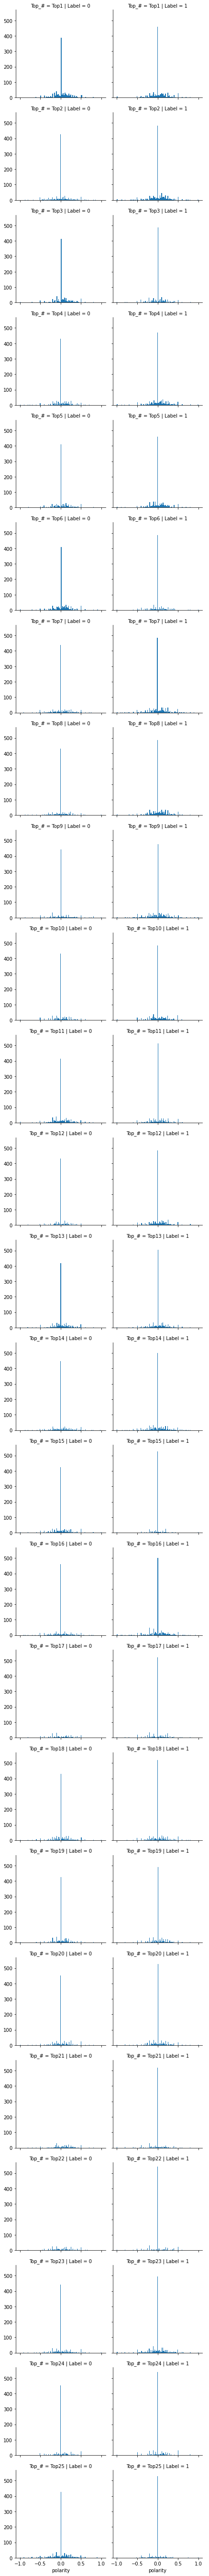

In [ ]:
g = sns.FacetGrid(df2, col='Label', row='Top_#')
g.map(plt.hist,'polarity', bins='auto')
g.add_legend()

In [ ]:
df_tf_idf = pd.DataFrame(features.toarray(), columns=vect.get_feature_names())
#print(df_tf_idf.head(5))

In [ ]:
!pip install sklearn-pandas

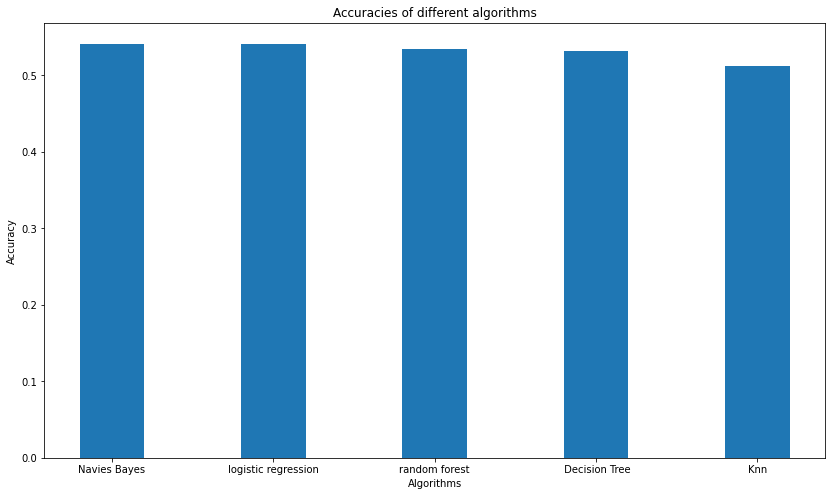

In [11]:
fin_score = {'Navies Bayes':0.5404290, 'logistic regression':0.5414970,
             'random forest':0.535040,' Decision Tree':0.531513,'Knn':0.5121436}
   
fig = plt.figure(figsize = (14, 8)) 
  
# creating the bar plot 
plt.bar(list(fin_score.keys()), list(fin_score.values()),  
        width = 0.4) 
  
plt.xlabel("Algorithms") 
plt.ylabel("Accuracy") 
plt.title("Accuracies of different algorithms") 
plt.show()

** Best for each classifier**

PS: Computed on GCP

*Model name : Navies Bayes*

{'classifier__selected_model': ('MultinomialNB', {'alpha': 0.01}), 'vectorizer__selected_model': ('vect', {'max_df': 0.75, 'max_features': None, 'ngram_range': (1, 1)})}


0.5404290565566815

*Model name : logistic regression*


{'classifier__selected_model': ('lr', {'penalty': 'l1', 'solver': 'liblinear'}), 'vectorizer__selected_model': ('vect', {'max_df': 1.0, 'max_features': 50000, 'ngram_range': (1, 2)})}

0.5414970154733829

*Model name : random forest*


{'classifier__selected_model': ('rf', {'criterion': 'entropy'}), 'vectorizer__selected_model': ('vect', {'max_df': 0.5, 'max_features': None, 'ngram_range': (1, 2)})}


0.5350402725228204

*Model name : Decision Tree*

{'classifier__selected_model': ('decisiontree', {'max_depth': 40}), 'vectorizer__selected_model': ('vect', {'max_df': 0.5, 'max_features': 50000, 'ngram_range': (1, 2)})}

0.5315139787682368

*Model name : Knn*

{'classifier__selected_model': ('knn', {'n_neighbors': 10, 'weights': 'distance'}), 'vectorizer__selected_model': ('vect', {'max_df': 1.0, 'max_features': None, 'ngram_range': (1, 1)})}

0.5121436604916072





# Ayush





In [ ]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns # To visualize relationship of variables
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
from google.colab import drive
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
drive.mount('/content/gdrive', force_remount= True)
print('Drive mounted')
file = r'/content/gdrive/MyDrive/Combined_News_DJIA.csv'
Combined_News = pd.read_csv(file)

file = r'/content/gdrive/MyDrive/RedditNews.csv'
Reddit_News = pd.read_csv(file, low_memory= False, parse_dates= [0])

file = r'/content/gdrive/MyDrive/upload_DJIA_table.csv'
DJIA_table = pd.read_csv(file, low_memory= False, parse_dates= [0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


Mounted at /content/gdrive
Drive mounted


In [ ]:
Combined_News["Closing Price"] = DJIA_table.Close # Adding the closing price from the upload_DJIA table
Combined_News = Combined_News.replace(np.nan, ' ', regex = True) #Replace the missing values with whitespace
Combined_News.isnull().sum().sum() #Check if all are missing headlines are replaced with a whitespace (should be zero)
Combined_News = Combined_News.replace('b\"|b\'|\\\\|\\\"', '', regex=True) #Clean out the 'non-word html tags' 

In [ ]:
# Split into train and testing datasets
train = Combined_News[Combined_News['Date'] < '2015-01-01']
test = Combined_News[Combined_News['Date'] > '2014-12-31']
train.head(1)


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Closing Price
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as countries move to brink of war,BREAKING: Musharraf to be impeached.',Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)',"Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire'","Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing",150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.',"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side","The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it.","Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]'",Did the U.S. Prep Georgia for War with Russia?',Rice Gives Green Light for Israel to Attack Iran: Says U.S. has no veto over Israeli military ops',Announcing:Class Action Lawsuit on Behalf of American Public Against the FBI',So---Russia and Georgia are at war and the NYT's top story is opening ceremonies of the Olympics? What a fucking disgrace and yet further proof of the decline of journalism.,China tells Bush to stay out of other countries' affairs,Did World War III start today?',"Georgia Invades South Ossetia - if Russia gets involved, will NATO absorb Georgia and unleash a full scale war?'",Al-Qaeda Faces Islamist Backlash',Condoleezza Rice: The US would not act to prevent an Israeli strike on Iran. Israeli Defense Minister Ehud Barak: Israel is prepared for uncompromising victory in the case of military hostilities.',This is a busy day: The European Union has approved new sanctions against Iran in protest at its nuclear programme.',"Georgia will withdraw 1,000 soldiers from Iraq to help fight off Russian forces in Georgia's breakaway region of South Ossetia",Why the Pentagon Thinks Attacking Iran is a Bad Idea - US News &amp; World Report',Caucasus in crisis: Georgia invades South Ossetia',Indian shoe manufactory - And again in a series of you do not like your work?',Visitors Suffering from Mental Illnesses Banned from Olympics',No Help for Mexico's Kidnapping Surge,17949.369141


In [ ]:
# Remove all the unnecessary things from the headlines
data = train.iloc[:, 2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
data2 = test.iloc[:,2:27]
data2.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

#Rename the column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index

# TUrn everything into smaller charactars
for index in new_Index:
    data[index]=data[index].str.lower()
  


#Now join and append all the feautures into the list (turn it into a paragraph)
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))


In [ ]:
# Now we take the sentences and covert them into vector feautures 
## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2)) # Using 2,2 for better accuracy 
traindataset=countvector.fit_transform(headlines)

# Now we implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Now we do the same transforming for our testing dataset (Convert into paragraphs)
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset) #Random forrest classifier

# Matrix transform
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)


[[  8 178]
 [  5 187]]
0.5158730158730159
              precision    recall  f1-score   support

           0       0.62      0.04      0.08       186
           1       0.51      0.97      0.67       192

    accuracy                           0.52       378
   macro avg       0.56      0.51      0.38       378
weighted avg       0.56      0.52      0.38       378

